Starting SGD with t=1
Epoch 1/20, MSE: 0.27241741936034597, Time for Epoch: 0:00:00.106846
Epoch 2/20, MSE: 0.2719926389074377, Time for Epoch: 0:00:00.118618
Epoch 3/20, MSE: 0.27193880122125075, Time for Epoch: 0:00:00.105991
Epoch 4/20, MSE: 0.27191205039805266, Time for Epoch: 0:00:00.117916
Epoch 5/20, MSE: 0.2718931502418716, Time for Epoch: 0:00:00.106692
Epoch 6/20, MSE: 0.27187902510285555, Time for Epoch: 0:00:00.108012
Epoch 7/20, MSE: 0.271868483710135, Time for Epoch: 0:00:00.108956
Epoch 8/20, MSE: 0.27186073093996926, Time for Epoch: 0:00:00.107436
Epoch 9/20, MSE: 0.27185514175293146, Time for Epoch: 0:00:00.111021
Epoch 10/20, MSE: 0.2718512122023334, Time for Epoch: 0:00:00.116975
Epoch 11/20, MSE: 0.2718485383351284, Time for Epoch: 0:00:00.119872
Epoch 12/20, MSE: 0.2718467999202031, Time for Epoch: 0:00:00.111150
Epoch 13/20, MSE: 0.27184574588338367, Time for Epoch: 0:00:00.122404
Epoch 14/20, MSE: 0.2718451813928731, Time for Epoch: 0:00:00.108048
Epoch 15/20, MS

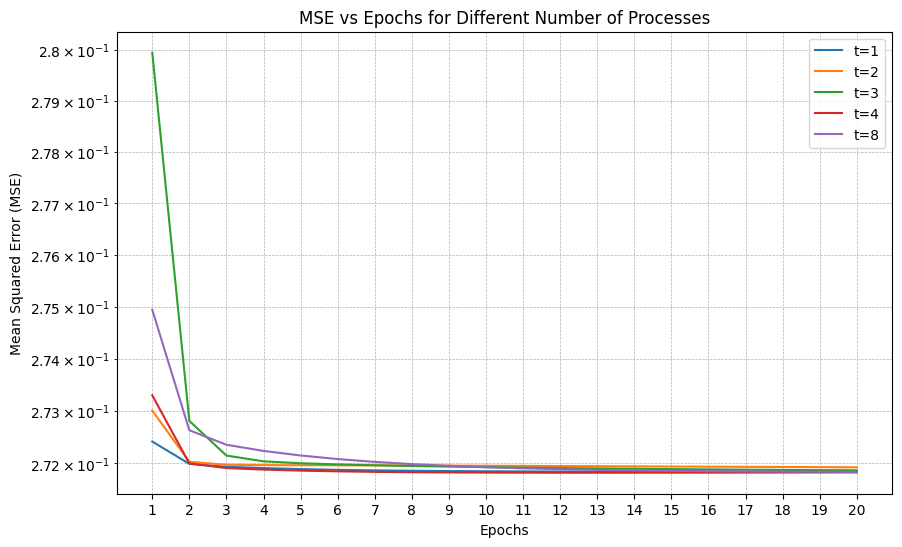

In [32]:
# Updated Code for SGD by Epoch with Debugging and Improved Plotting

from SGD_by_Epoch import shuffle_data, sgd_by_epoch_process
from multiprocessing import Pool
import numpy as np
from sklearn.metrics import mean_squared_error
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
dataframe = pd.read_excel('dataset1.xlsx')

X = dataframe['V'].sort_values()
X = (X - X.mean()) / X.std()
y = dataframe['AT'][X.index].values
y = (y - y.mean()) / y.std()

X = np.reshape(X.values, (-1, 1))


# Defining Utility Functions
def polynomial_basis_function_transformation(X, h):
    """
    Converts an (N * 1) matrix into a (N * h) matrix, where h is the number of basis functions.
    The degree of the polynomial is (h-1).

    Parameters:
    - X: (N * 1) matrix of input features.
    - h: Number of basis functions (degree + 1).

    Returns:
    - X_poly: (N * h) matrix after applying polynomial basis functions.
    """
    powers = np.arange(h)
    X_poly = np.power(X, powers)
    return X_poly


def sgd_by_epoch(X, y, h, b_alpha, n, t):
    """
    Conducts Linear Regression using SGD with parallelization by epoch.
    """
    start = datetime.now()
    X_poly = polynomial_basis_function_transformation(X, h)
    epoch_size = len(X_poly)
    full_epochs = n // epoch_size

    # Initialize shared weights for the first epoch
    shared_weights = np.random.rand(h)

    # Parallelize shuffling
    with Pool(processes=t) as pool:
        shuffled_data = pool.starmap(shuffle_data, [(X_poly, y) for _ in range(t)])

    mse_history = []  # Track MSE for each epoch

    for epoch in range(full_epochs):
        alpha = dynamic_learning_rate(epoch, b_alpha)
        epoch_start = datetime.now()

        with Pool(processes=t) as pool:
            outputs = pool.starmap(
                sgd_by_epoch_process,
                [(shuffled_data[i][0], shuffled_data[i][1], h, alpha, shared_weights) for i in range(t)]
            )

        shared_weights = np.mean(outputs, axis=0)

        # Calculate MSE for the current epoch
        y_hat_poly = X_poly @ shared_weights
        mse = mean_squared_error(y, y_hat_poly)
        mse_history.append(mse)

        epoch_end = datetime.now()

        print(f"Epoch {epoch + 1}/{full_epochs}, MSE: {mse}, Time for Epoch: {epoch_end - epoch_start}")

    final_beta_hat = shared_weights
    total_end = datetime.now()
    print(f"Total Time for Training: {total_end - start}")

    return mse_history

def dynamic_learning_rate(epoch, base_alpha, decay_rate=0.1):
    return base_alpha / (1 + decay_rate * epoch)

# Plotting Function with Debugging
def plot_mse_vs_epochs(X, y, h, alpha, n):
    t_values = [1, 2, 3, 4, 8]  # List of `t` values
    plt.figure(figsize=(10, 6))

    for t in t_values:
        print(f"Starting SGD with t={t}")
        mse_history = sgd_by_epoch(X, y, h, alpha, n, t)
        print(f"MSE history for t={t}: {mse_history}")  # Debug statement
        if mse_history:  # Ensure there's data to plot
            plt.plot(range(1, len(mse_history) + 1), mse_history, label=f't={t}')
        else:
            print(f"No data to plot for t={t}")

    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('MSE vs Epochs for Different Number of Processes')

    # Set log scale for MSE (y-axis)
    plt.yscale('log')

    # Adding grid and legend
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(np.arange(1, len(mse_history) + 1, 1))  # Ensure x-axis is integer and includes all epochs
    plt.show()


# Running the Plotting Function
plot_mse_vs_epochs(X, y, 4, 0.001, 200000)

Starting SGD with t=1
Epoch 1/31, MSE: 0.2792487873928102, Time for Epoch: 0:00:00.102642
Epoch 2/31, MSE: 0.27287139818919587, Time for Epoch: 0:00:00.105547
Epoch 3/31, MSE: 0.27232991063371964, Time for Epoch: 0:00:00.120432
Epoch 4/31, MSE: 0.27221354650826335, Time for Epoch: 0:00:00.109102
Epoch 5/31, MSE: 0.2721418559974812, Time for Epoch: 0:00:00.104471
Epoch 6/31, MSE: 0.2720848113272982, Time for Epoch: 0:00:00.110737
Epoch 7/31, MSE: 0.2720387573048712, Time for Epoch: 0:00:00.105092
Epoch 8/31, MSE: 0.27200175612193783, Time for Epoch: 0:00:00.121091
Epoch 9/31, MSE: 0.27197206990620315, Time for Epoch: 0:00:00.112716
Epoch 10/31, MSE: 0.27194821478016207, Time for Epoch: 0:00:00.119867
Epoch 11/31, MSE: 0.2719289858279134, Time for Epoch: 0:00:00.109249
Epoch 12/31, MSE: 0.27191342684433706, Time for Epoch: 0:00:00.114025
Epoch 13/31, MSE: 0.2719007854531888, Time for Epoch: 0:00:00.108376
Epoch 14/31, MSE: 0.27189047072407624, Time for Epoch: 0:00:00.110027
Epoch 15/31, 

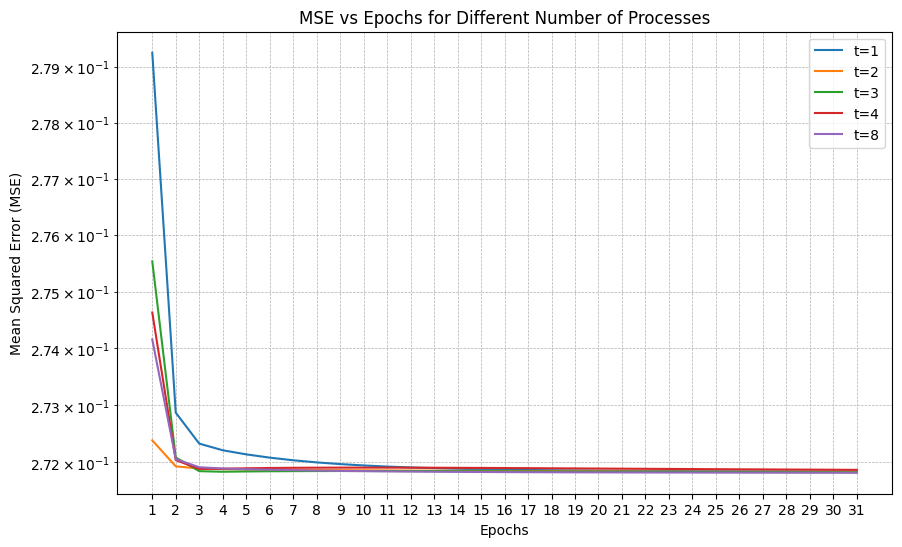

In [33]:
plot_mse_vs_epochs(X, y, 4, 0.001, 300000)

Starting SGD with t=1
Epoch 1/52, MSE: 0.27441070803614115, Time for Epoch: 0:00:00.108381
Epoch 2/52, MSE: 0.2721287154475511, Time for Epoch: 0:00:00.114208
Epoch 3/52, MSE: 0.2719948084646735, Time for Epoch: 0:00:00.116641
Epoch 4/52, MSE: 0.27197548090055673, Time for Epoch: 0:00:00.121205
Epoch 5/52, MSE: 0.27195949503935823, Time for Epoch: 0:00:00.112651
Epoch 6/52, MSE: 0.2719437137899358, Time for Epoch: 0:00:00.113541
Epoch 7/52, MSE: 0.27192939348513856, Time for Epoch: 0:00:00.131478
Epoch 8/52, MSE: 0.27191687839623424, Time for Epoch: 0:00:00.110971
Epoch 9/52, MSE: 0.2719060592043156, Time for Epoch: 0:00:00.110676
Epoch 10/52, MSE: 0.2718967072412017, Time for Epoch: 0:00:00.111142
Epoch 11/52, MSE: 0.2718885927878549, Time for Epoch: 0:00:00.112915
Epoch 12/52, MSE: 0.2718815172244518, Time for Epoch: 0:00:00.113303
Epoch 13/52, MSE: 0.2718753167525277, Time for Epoch: 0:00:00.130699
Epoch 14/52, MSE: 0.27186985806520864, Time for Epoch: 0:00:00.114489
Epoch 15/52, MS

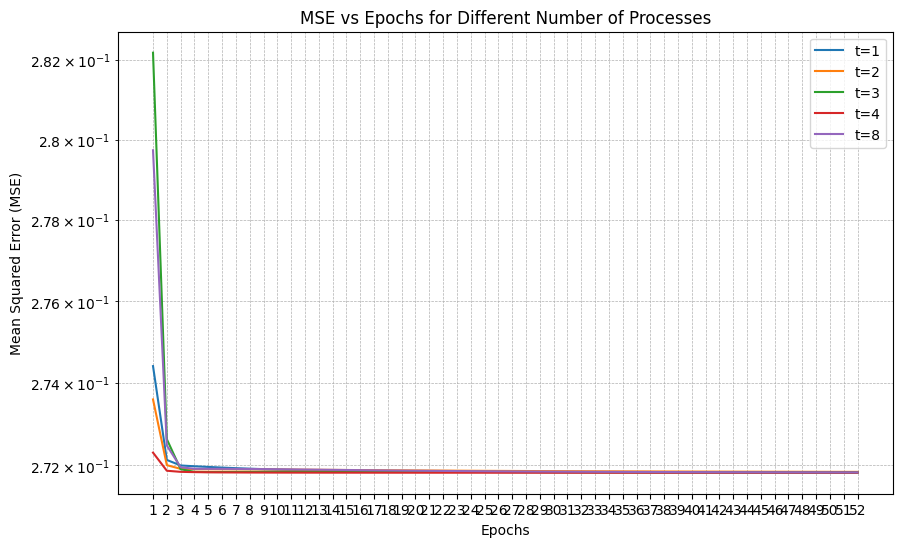

In [34]:
plot_mse_vs_epochs(X, y, 4, 0.001, 500000)

Starting SGD with t=1
Epoch 1/94, MSE: 0.27688076480639023, Time for Epoch: 0:00:00.114483
Epoch 2/94, MSE: 0.272385329866851, Time for Epoch: 0:00:00.116529
Epoch 3/94, MSE: 0.2721358239309804, Time for Epoch: 0:00:00.123454
Epoch 4/94, MSE: 0.2720929807813794, Time for Epoch: 0:00:00.120604
Epoch 5/94, MSE: 0.2720612283214536, Time for Epoch: 0:00:00.119555
Epoch 6/94, MSE: 0.27203235788991975, Time for Epoch: 0:00:00.110594
Epoch 7/94, MSE: 0.2720071924860082, Time for Epoch: 0:00:00.126715
Epoch 8/94, MSE: 0.2719857649947308, Time for Epoch: 0:00:00.113354
Epoch 9/94, MSE: 0.2719676228137249, Time for Epoch: 0:00:00.125924
Epoch 10/94, MSE: 0.2719522225581428, Time for Epoch: 0:00:00.110937
Epoch 11/94, MSE: 0.2719390716683244, Time for Epoch: 0:00:00.121040
Epoch 12/94, MSE: 0.2719277611421298, Time for Epoch: 0:00:00.126600
Epoch 13/94, MSE: 0.2719179621701838, Time for Epoch: 0:00:00.114218
Epoch 14/94, MSE: 0.2719094132838414, Time for Epoch: 0:00:00.113158
Epoch 15/94, MSE: 0.

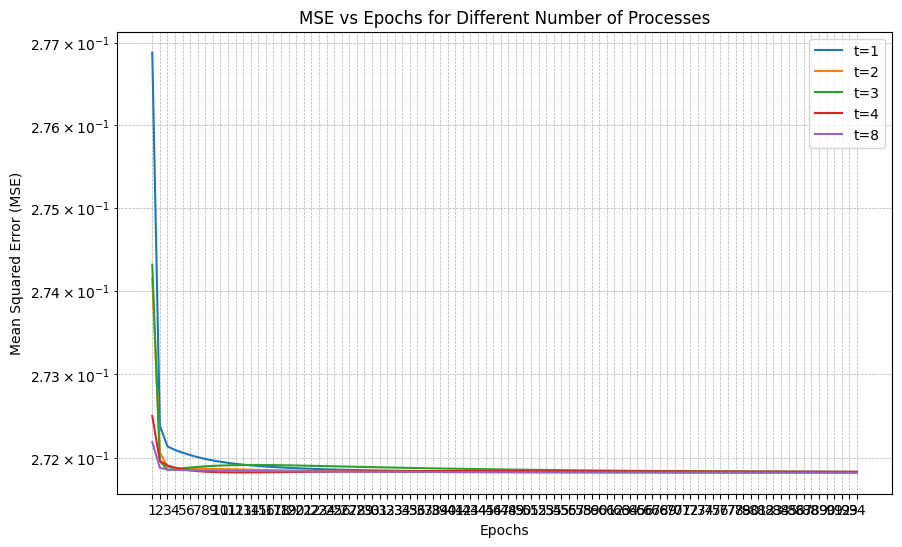

In [35]:
plot_mse_vs_epochs(X, y, 4, 0.001, 900000)